# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

### Setup

In [1]:
%matplotlib inline

In [2]:
import cv2
import helpers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
import tensorflow.contrib.layers as tfcl

from collections import Counter
from sklearn.utils import shuffle
from tqdm import tqdm

### Load

In [3]:
(training_file, 
     validation_file, 
     testing_file) = helpers.get_traffic_signs_data()

File download skipped, it already exists, use force==True to overwrite.

Skipping unzipping of pickled files, as they've been previously extracted,
use force==True to overwrite


In [4]:
# Load pickled data
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
    
with open(validation_file, mode='rb') as f:
    validation = pickle.load(f)
    
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train, X_train_sizes, X_train_coords = train['features'], train['labels'], train['sizes'], train['coords']
X_validation, y_validation, X_validation_sizes, X_validation_coords = validation['features'], validation['labels'], validation['sizes'], validation['coords']
X_test, y_test, X_test_sizes, X_test_coords = test['features'], test['labels'], test['sizes'], test['coords']

print(type(X_train))

<class 'numpy.ndarray'>


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples\t= {:>6,}".format(n_train))
print("Number of validation examples\t= {:>6,}".format(n_validation))
print("Number of testing examples\t= {:>6,}".format(n_test))
print("-" * 40)
print("Total examples\t\t\t= {:>6,}\n".format(n_train + n_validation + n_test))
print("Image data shape\t\t= {}".format(image_shape))
print("Number of classes\t\t= {}".format(n_classes))

Number of training examples	= 34,799
Number of validation examples	=  4,410
Number of testing examples	= 12,630
----------------------------------------
Total examples			= 51,839

Image data shape		= (32, 32, 3)
Number of classes		= 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

25
(32, 32, 3)


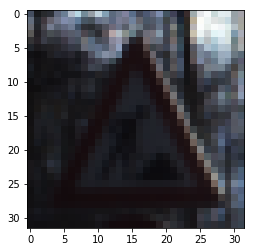

[[[ 69  79  96]
  [ 24  26  28]
  [ 40  42  45]
  ..., 
  [225 234 237]
  [151 161 166]
  [164 162 169]]

 [[ 99 110 125]
  [ 36  41  47]
  [ 63  56  62]
  ..., 
  [197 216 224]
  [154 163 169]
  [164 163 159]]

 [[104 107 113]
  [ 34  37  40]
  [ 72  70  77]
  ..., 
  [223 237 235]
  [181 192 198]
  [166 167 159]]

 ..., 
 [[ 21  20  23]
  [ 23  24  30]
  [ 19  20  24]
  ..., 
  [ 45  47  54]
  [ 58  62  70]
  [ 58  70  82]]

 [[ 18  17  21]
  [ 19  19  24]
  [ 18  18  23]
  ..., 
  [ 36  36  40]
  [ 58  59  70]
  [ 61  69  81]]

 [[ 17  16  19]
  [ 16  15  18]
  [ 16  15  18]
  ..., 
  [ 40  40  44]
  [ 57  62  73]
  [ 57  68  80]]]


In [6]:
EXAMPLE_IMG_INDEX = 34798

def print_example(X, y, img_num = None):
    if img_num == None:
        img_num = EXAMPLE_IMG_INDEX
    
    print(y[img_num])
    print(X[img_num].shape)
    
    plt.imshow(X[img_num])
    plt.show()
    
    print(X[img_num])
    
print_example(X_train, y_train)

Grayscale and the Y channel, from image when converted to YUV, are almost the same

In [7]:
def inspect_channels(img):
    # show rgb
    plt.imshow(img)
    plt.show()

    # show grayscale
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
    plt.show()

    # yuv channels
    y_channel, u_channel, v_channel = cv2.split(cv2.cvtColor(img, cv2.COLOR_RGB2YUV))

    # show y channel
    plt.imshow(y_channel)
    plt.show()

    # show u channel
    plt.imshow(u_channel)
    plt.show()

    # show v channel
    plt.imshow(v_channel)
    plt.show()

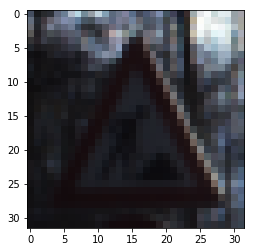

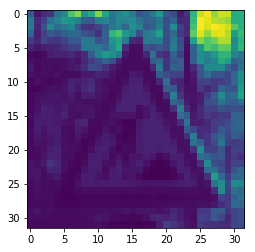

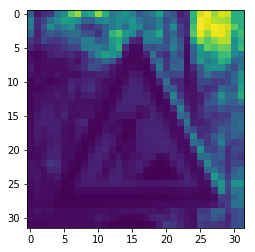

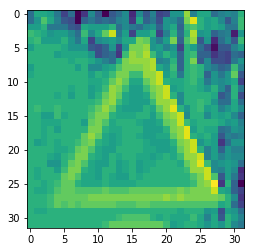

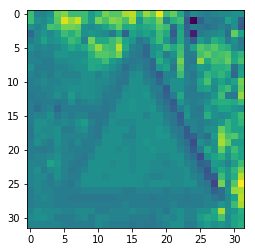

In [8]:
img = X_train[EXAMPLE_IMG_INDEX][:].copy()
inspect_channels(img)

### Bounding box

In [9]:
X_train_sizes[EXAMPLE_IMG_INDEX]

array([230, 201], dtype=uint8)

In [10]:
x_scale, y_scale = 32 / X_train_sizes[EXAMPLE_IMG_INDEX]
print("x_scale = {:.3f}\ny_scale = {:.3f}".format(y_scale, x_scale))

x_scale = 0.159
y_scale = 0.139


Coords structure is (x1, y1, x2, y2)

In [11]:
X_train_coords[EXAMPLE_IMG_INDEX]

array([ 20,  18, 211, 184], dtype=uint8)

In [12]:
x1, x2 = [int(X_train_coords[EXAMPLE_IMG_INDEX][i] * x_scale) for i in (0, 2)]

In [13]:
y1, y2 = [int(X_train_coords[EXAMPLE_IMG_INDEX][i] * y_scale) for i in (1, 3)]

In [14]:
np.array([x1, y1, x2, y2])

array([ 2,  2, 29, 29])

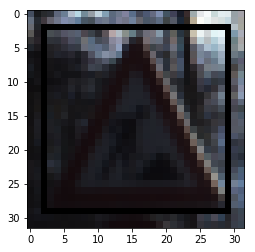

In [15]:
img = cv2.rectangle(img, (x1, y1), (x2, y2), [0, 0, 0])
plt.imshow(img)
plt.show()

In [16]:
ignore_mask_color = 255

left_top = [x1, y1]
left_bottom = [x1, y2]
right_top = [x2, y1]
right_bottom = [x2, y2]

vertices = np.array([[left_bottom, left_top, right_top, right_bottom]])
vertices

array([[[ 2, 29],
        [ 2,  2],
        [29,  2],
        [29, 29]]])

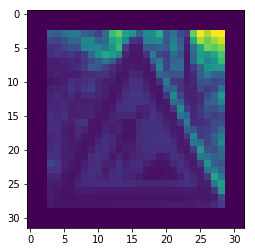

In [17]:
y_channel, _, _ = cv2.split(cv2.cvtColor(img, cv2.COLOR_RGB2YUV))
mask = np.zeros_like(y_channel)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_img = cv2.bitwise_and(y_channel, mask)

plt.imshow(masked_img)
plt.show()

In [18]:
del x_scale, y_scale, x1, y1, x2, y2, ignore_mask_color
del left_bottom, left_top, right_top, right_bottom
del vertices, y_channel, mask, masked_img, img

### Inspection to see if data is sorted

The data looks sorted to some degree, therefore it will require shuffling before passing through the
CNN.

In [19]:
y_train[:9]

array([41, 41, 41, 41, 41, 41, 41, 41, 41], dtype=uint8)

In [20]:
y_train[25786:25795]

array([21, 21, 21, 21, 21, 21, 21, 21, 21], dtype=uint8)

In [21]:
classes = Counter()

for y in y_train:
    classes[y] += 1

### Inspection to ensure enough observations exist for each class

In [22]:
classes.most_common(10)

[(2, 2010),
 (1, 1980),
 (13, 1920),
 (12, 1890),
 (38, 1860),
 (10, 1800),
 (4, 1770),
 (5, 1650),
 (25, 1350),
 (9, 1320)]

In [23]:
# 10 least common
classes.most_common()[:-10:-1]  

[(37, 180),
 (19, 180),
 (0, 180),
 (42, 210),
 (41, 210),
 (32, 210),
 (27, 210),
 (29, 240),
 (24, 240)]

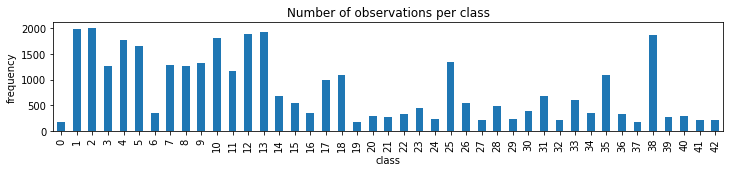

In [24]:
df = pd.Series(classes)
df.plot(kind="bar", figsize=(12,2))

plt.title("Number of observations per class")
plt.xlabel("class")
plt.ylabel("frequency")
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Region of interest

In [25]:
def roi_scaled_coords(img_size, coords):
    x_scale, y_scale = 32 / img_size
    
    x1, x2 = [int(coords[i] * x_scale) for i in (0, 2)]
    y1, y2 = [int(coords[i] * y_scale) for i in (1, 3)]
    
    return x1, y1, x2, y2

In [26]:
def roi_vertices(img_size, coords):
#     x_scale, y_scale = 32 / img_size
    
#     x1, x2 = [int(coords[i] * x_scale) for i in (0, 2)]
#     y1, y2 = [int(coords[i] * y_scale) for i in (1, 3)]
#     scaled_coords = np.array([x1, y1, x2, y2])
    x1, y1, x2, y2 = roi_scaled_coords(img_size, coords)
    
    left_top = [x1, y1]
    left_bottom = [x1, y2]
    right_top = [x2, y1]
    right_bottom = [x2, y2]
    
    vertices = np.array([[left_bottom, left_top, right_top, right_bottom]])
    
    return vertices

In [27]:
def roi_bounding_box(img, img_size, coords):
    x1, y1, x2, y2 = roi_scaled_coords(img_size, coords)
    
    # remove colour from bounding box
    roi_bbox_img = cv2.rectangle(img, (x1, y1), (x2, y2), [0, 0, 0])
    
    return roi_bbox_img

In [28]:
def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    
    #filling pixels inside the polygon defined by "vertices" with the fill color
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    
    return masked_image

In [29]:
X_train_vertices = [roi_vertices(size, coords) for size, coords in zip(X_train_sizes, X_train_coords)]
X_train_bbox = [roi_bounding_box(img, size, coords) for img, size, coords in zip(X_train, X_train_sizes, X_train_coords)]
X_train_roi = [region_of_interest(img, vertices) for img, vertices in zip(X_train_bbox, X_train_vertices)]

25
(32, 32, 3)


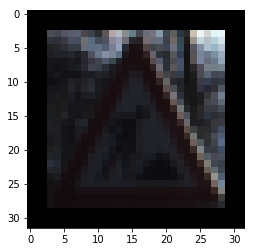

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ..., 
 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [30]:
print_example(X_train_roi, y_train)

### Convert images to grayscale

In [31]:
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [32]:
X_train_gray = [grayscale(img) for img in X_train_roi]

25
(32, 32)


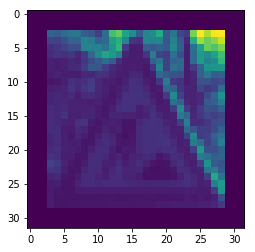

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [33]:
print_example(X_train_gray, y_train)

### Normalise

In [34]:
def normalise(img):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.
    : return: Numpy array of normalize data
    """
    return np.array(img / 255.0, dtype=np.float32)

In [35]:
X_train_norm = [normalise(img) for img in X_train_roi]

25
(32, 32, 3)


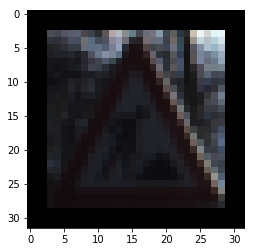

[[[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 ..., 
 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]]


In [36]:
print_example(X_train_norm, y_train)

### Shuffle

In [37]:
X_train_shuffled, y_train_shuffled = shuffle(X_train_roi, y_train)

In [38]:
y_train_shuffled[:9]

array([ 7, 12, 10,  8,  4,  6,  3,  4, 15], dtype=uint8)

8
(32, 32, 3)


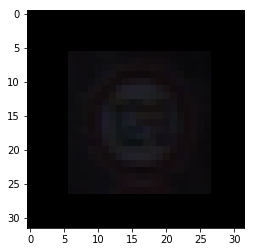

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ..., 
 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [39]:
print_example(X_train_shuffled, y_train_shuffled)

### Pre-process data

In [40]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def preprocess_data(X, X_sizes, X_coords):
    
    X_vertices = [roi_vertices(size, coords) for size, coords in zip(X_sizes, X_coords)]

    X = [grayscale(x) for x in X]
    X = [roi_bounding_box(x, size, coords) for x, size, coords in zip(X, X_sizes, X_coords)]
    X = [region_of_interest(x, vertices) for x, vertices in zip(X, X_vertices)]
    X = [normalise(x) for x in X]
    X = [np.reshape(img, [32, 32, 1]) for img in X]
    
    return X

In [41]:
X_train = preprocess_data(X_train, X_train_sizes, X_train_coords)
X_validation = preprocess_data(X_validation, X_validation_sizes, X_validation_coords)

In [42]:
X_train[0].shape

(32, 32, 1)

In [43]:
X_validation[0].shape

(32, 32, 1)

## Model Architecture

In [44]:
# http://stackoverflow.com/a/43011613/893766
# https://arxiv.org/pdf/1511.07289.pdf
def inception_module(x, mu, sigma, in_channels, n_filters):
    # bias dimension = 3*filter_count and then the extra in_channels for the avg pooling
    bias = tf.Variable(tf.zeros([3 * n_filters + in_channels]))

    # 1x1
    one_filter = tf.Variable(tf.truncated_normal([1, 1, in_channels, n_filters], mu, sigma))
    one_by_one = tf.nn.conv2d(x, one_filter, strides=[1, 1, 1, 1], padding='SAME')

    # 3x3
    three_filter = tf.Variable(tf.truncated_normal([3, 3, in_channels, n_filters], mu, sigma))
    three_by_three = tf.nn.conv2d(one_by_one, three_filter, strides=[1, 1, 1, 1], padding='SAME')

    # 5x5
    five_filter = tf.Variable(tf.truncated_normal([5, 5, in_channels, n_filters], mu, sigma))
    five_by_five = tf.nn.conv2d(one_by_one, five_filter, strides=[1, 1, 1, 1], padding='SAME')

    # avg pooling
    pooling = tf.nn.avg_pool(x, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='SAME')
    pooling = tf.nn.conv2d(pooling, one_filter, strides=[1, 1, 1, 1], padding='SAME')

    # tensorflow 1.0+ -> use tf.concat(), NOT tf.concat_v2()
    x = tf.concat_v2([one_by_one, three_by_three, five_by_five, pooling], 3)
    x = tf.nn.bias_add(x, bias)
    
    return tf.nn.elu(x)

In [45]:
# http://www.cs.toronto.edu/~guerzhoy/321/lec/W06/convnets.pdf
def inception(x, mu, sigma, in_channels, n_filters, keep_prob):
    
    # inception module
    i1 = inception_module(x, mu, sigma, in_channels, n_filters)
    
    # flatten
    fc0 = tfcl.flatten(i1)
    
    # fully connected layer 1
    fc1 = tfcl.fully_connected(fc0, 1024, activation_fn=tf.nn.elu)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # fully connected layer 2
    fc2 = tfcl.fully_connected(fc1, 512, activation_fn=tf.nn.elu)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # logits / output layer / fully connected layer 3
    logits = tfcl.fully_connected(fc2, 43, activation_fn=None)

    return logits

In [46]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf
def LeNet(x, mu, sigma, in_channels, n_filters, keep_prob): 
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.elu(conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.elu(conv2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # inception module
    i1 = inception_module(x, mu, sigma, in_channels, n_filters)

    # Flatten. Input = 5x5x16. Output = 400.
    conv1 = tfcl.flatten(conv1)
    conv2 = tfcl.flatten(conv2)
    i1 = tfcl.flatten(i1)
    fc0 = tf.concat(1, [conv1, conv2, i1])
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tfcl.fully_connected(fc0, 120, activation_fn=tf.nn.elu)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tfcl.fully_connected(fc1, 84, activation_fn=tf.nn.elu)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tfcl.fully_connected(fc2, 43, activation_fn=None)
    
    return logits

### Hyperparameters

In [47]:
# batching
epochs = 100
batch_size = 128
in_channels = 1
n_filters = 1

# weight initialisation
mu = 0
sigma = 0.1

# dropout
keep_prob = 0.75

# optimiser
starter_learning_rate = 1e-3
decay_steps = len(X_train) / 3
decay_rate = 0.9

# stats
stats = np.zeros([epochs, 3])
df = pd.DataFrame(columns=['epoch', 'loss', 'accuracy'])

### Training pipeline

In [48]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           decay_steps, decay_rate, staircase=True)

# logits = LeNet(x, mu, sigma, keep_prob) # working
logits = LeNet(x, mu, sigma, in_channels, n_filters, keep_prob)
# logits = inception(x, mu, sigma, in_channels, n_filters, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [49]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [50]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_loss = 0
    total_accuracy = 0
    
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset + batch_size], y_data[offset:offset + batch_size]
        
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y})
        
        total_loss += (loss * len(batch_x))
        total_accuracy += (accuracy * len(batch_x))
    
    validation_loss = total_loss / num_examples
    validation_accuracy = total_accuracy / num_examples
    
    return validation_loss, validation_accuracy

In [51]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    
    for i in range(epochs):
        epoch = i + 1
        X_train, y_train = shuffle(X_train, y_train)
        
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            batch_x, batch_y = shuffle(batch_x, batch_y)
            
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_loss, validation_accuracy = evaluate(X_validation, y_validation)
        
        stats[i] = [epoch, validation_loss, validation_accuracy]
        print("Epoch {:>3}\tValidation Loss {:.3f}\tValidation Accuracy = {:.3f}".format(epoch, validation_loss, validation_accuracy))
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...
Epoch   1	Validation Loss 0.817	Validation Accuracy = 0.763
Epoch   2	Validation Loss 0.565	Validation Accuracy = 0.837
Epoch   3	Validation Loss 0.468	Validation Accuracy = 0.871
Epoch   4	Validation Loss 0.367	Validation Accuracy = 0.901
Epoch   5	Validation Loss 0.397	Validation Accuracy = 0.897
Epoch   6	Validation Loss 0.319	Validation Accuracy = 0.913
Epoch   7	Validation Loss 0.321	Validation Accuracy = 0.915
Epoch   8	Validation Loss 0.294	Validation Accuracy = 0.923
Epoch   9	Validation Loss 0.306	Validation Accuracy = 0.925
Epoch  10	Validation Loss 0.294	Validation Accuracy = 0.932
Epoch  11	Validation Loss 0.316	Validation Accuracy = 0.922
Epoch  12	Validation Loss 0.281	Validation Accuracy = 0.933
Epoch  13	Validation Loss 0.300	Validation Accuracy = 0.929
Epoch  14	Validation Loss 0.285	Validation Accuracy = 0.932
Epoch  15	Validation Loss 0.296	Validation Accuracy = 0.933
Epoch  16	Validation Loss 0.277	Validation Accuracy = 0.937
Epoch  17	Validation Loss 0.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9cce45860>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fc9cfcb2e80>], dtype=object)

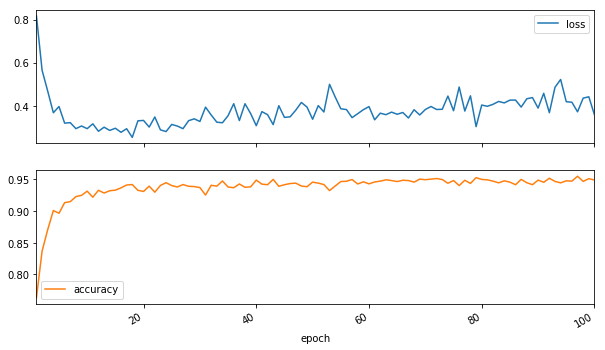

In [52]:
df = pd.DataFrame(stats, columns=['epoch', 'loss', 'accuracy'])
df.plot(x='epoch', y=['loss', 'accuracy'], figsize=(10, 6), subplots=True, sharex=True)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [53]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [54]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [55]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [56]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [57]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")